# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [5]:
library(tidyverse)
library(ggrepel)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [6]:
vax_us = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
vax_us |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [8]:
# create the df_vacc_rates here


df_vacc_rates = vax_us |>
    filter(mmr >= 0) |>
    group_by(state) |> 
    summarize(perc = sum(mmr >= 95, na.rm = TRUE)/n())

df_vacc_rates

state,perc
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [9]:
df_vacc_rates |> 
    arrange(perc)

state,perc
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715
Arizona,0.506404782
Oregon,0.593052109
Colorado,0.623092236


In [10]:
df_vacc_rates |> 
    top_n(n = 1, wt = -perc)

state,perc
<chr>,<dbl>
Arkansas,0.003527337


Arkansas is the state with the smallest fraction of schools above the CDC target vaccination rate of 95%. 

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [11]:
vax_us |>
    filter(state == "North Carolina") |>
    head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297
2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281
3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403
4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704
5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820
6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674


In [12]:
NC_vax = vax_us |>
    filter(state == "North Carolina", overall >= 0) |>
    arrange(overall) |>
    mutate(rn = row_number(), fraction_of_schools = rn / max(rn)) 

NC_vax |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,rn,fraction_of_schools
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,1,0.0004798464
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,2,0.0009596929
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,3,0.0014395393
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,4,0.0019193858
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,5,0.0023992322
1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,6,0.0028790787


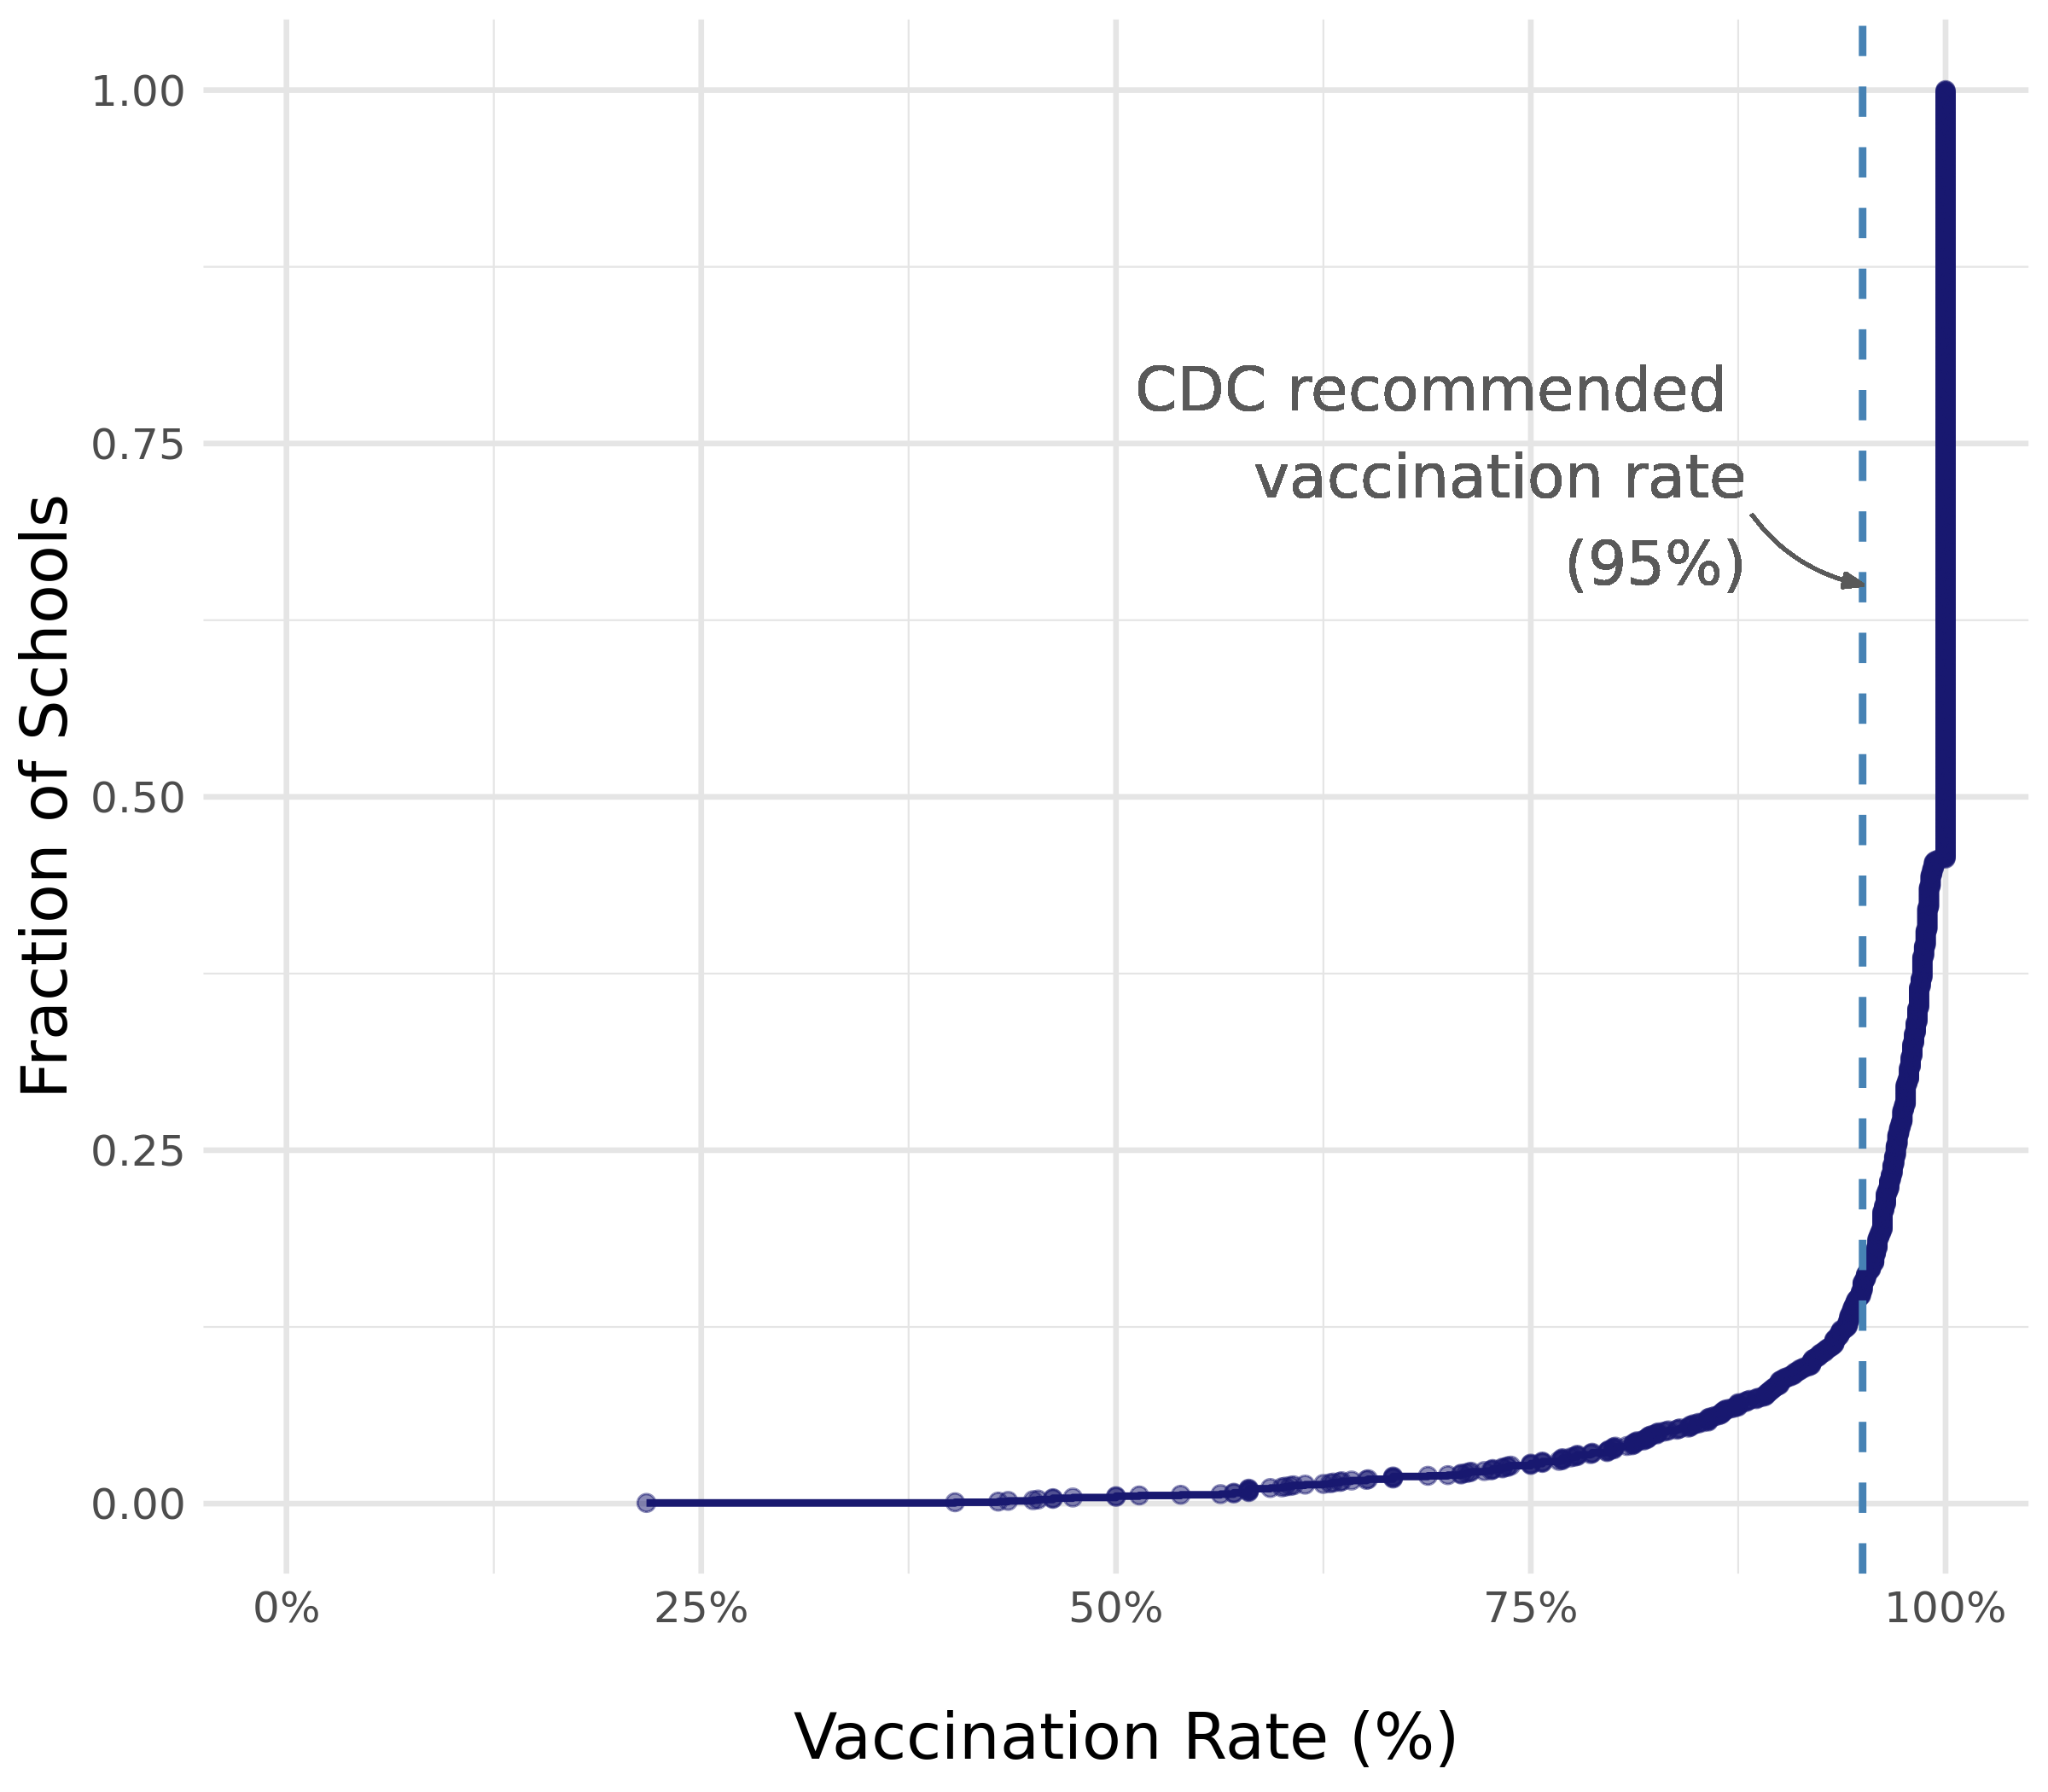

In [50]:
options(repr.plot.width = 8, repr.plot.height = 7, repr.plot.res = 300)


ecdf = ggplot(NC_vax, aes(x = overall, y = fraction_of_schools)) +
        geom_step(linewidth = 1, color = 'midnightblue') +
    # stat_ecdf(geom = "line", linewidth = 1) + 
        geom_point(alpha = 0.5, size = 2, color = 'midnightblue') +
        geom_vline(aes(xintercept = 95), 
                   color = 'steel blue', linetype = 'dashed', linewidth = 1) +
    #     annotate("text", x = 78, y = 0.70, label = "CDC recommended
    # vaccination rate
    #         (95%)", color = 'grey41') +
        geom_text(aes(x = 88, y = 0.65, label = "CDC recommended 
                                                    vaccination rate
                                                    (95%)"),
                 hjust = 1, vjust = 0, color = 'grey35', size = 6) +
        geom_curve(
          aes(xend = 95, yend = 0.65, x = 88.3, y = .70),
          curvature = 0.2, arrow = arrow(type = "closed", angle = 20, length = unit(0.2, "cm")),
            color = 'grey35') +
        theme_minimal() +
        scale_x_continuous(labels = scales::percent_format(scale = 1), limits = c(0,100)) +
        labs(x = "\n Vaccination Rate (%)", y = "Fraction of Schools") +
        theme(
            text = element_text(size=15), 
            axis.title.x = element_text(size = 18), 
            axis.title.y = element_text(size = 18),
            panel.grid.major =  element_line(color = 'grey90', size = 0.75),
            panel.grid.minor = element_line(color = 'grey90', size = 0.25)
        ) 
       
ecdf
       
        


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)


Is the median vaccination rate for NC schools above the CDC recommended target?

In [15]:
NC_vax2 = NC_vax |>
    filter(overall >= 0) |> 
    summarize(med = median(overall))

NC_vax2

med
<dbl>
100


The median vaccination rate for NC schools is above the CDC recommended 95% vaccination rate.